In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def imshow(img):
    img = img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

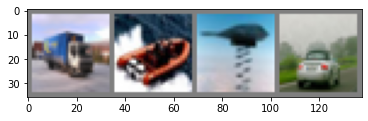

truck  ship plane   car


In [15]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]]for j in range(4)))

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        optimizer.zero_grad()
        
        ouputs=net(inputs)
        loss=criterion(ouputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if i%2000==1999:
            print('[%d,%5d] loss: %.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss=0.0

print('Finished training')

[1, 2000] loss: 2.176
[1, 4000] loss: 1.855
[1, 6000] loss: 1.665
[1, 8000] loss: 1.553
[1,10000] loss: 1.516
[1,12000] loss: 1.445
[2, 2000] loss: 1.411
[2, 4000] loss: 1.368
[2, 6000] loss: 1.331
[2, 8000] loss: 1.308
[2,10000] loss: 1.299
[2,12000] loss: 1.279
Finished training


In [20]:
outputs=net(images)
_,predicted=torch.max(outputs,1)
print('Predicted: ',' '.join('%5s'%classes[predicted[j]] for j in range(4)))

Predicted:  truck truck plane  ship


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [22]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 40 %
Accuracy of   car : 75 %
Accuracy of  bird : 13 %
Accuracy of   cat : 20 %
Accuracy of  deer : 49 %
Accuracy of   dog : 68 %
Accuracy of  frog : 57 %
Accuracy of horse : 65 %
Accuracy of  ship : 76 %
Accuracy of truck : 66 %
